In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('data.png', 0)

In [3]:
def line_length(x1, y1, x2, y2):
    return ((x1-x2)**2 + (y1-y2)**2)**(1/2)

def x_delta(x1, x2):
    return abs(x2-x1) 

In [10]:
import sys
min_x = sys.float_info.max
max_x = sys.float_info.min
min_y = sys.float_info.max
max_y = sys.float_info.min
for i in range(len(filtered)):
    curr = filtered[i][0]
    if curr[0] < min_x:
        min_x = curr[0]
    if curr[0] > max_x:
        max_x = curr[0]
    if curr[1] < min_y:
        min_y = curr[1]
    if curr[3] > max_y:
        max_y = curr[3]

In [5]:
filtered = []
for line in lines:
    if line_length(line[0][0], line[0][1], line[0][2], line[0][3]) > 200:
        filtered.append(line)
    if x_delta(line[0][0], line[0][2]) > 3 and  x_delta(line[0][0], line[0][2]) <5:
        filtered.append(line)
filtered = np.array(filtered)

In [6]:
def show_im(img):
    cv2.imshow("LSD",img)
    cv2.waitKey()
    cv2.destroyWindow("LSD")

In [19]:
lsd = cv2.createLineSegmentDetector(0)
lines = lsd.detect(img)[0]
drawn_img = lsd.drawSegments(img,filtered)


In [20]:
show_im(drawn_img)

In [8]:
m = 600

In [11]:
pts1 = np.float32([[min_x, min_y], [min_x, max_y], [max_x, min_y], [max_x, max_y]])
pts2 = np.float32([[0,0],[0,m],[m,0],[m,m]])

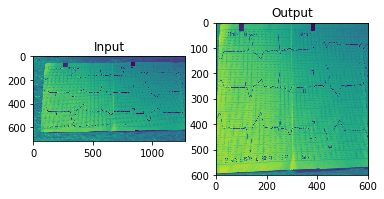

In [12]:
M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(m,m))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [17]:
height = int(line_length(min_x, min_y, min_x, max_y))
width = int(line_length(min_x, max_y, max_y, max_x))

In [18]:
height, width

(592, 853)